#                                     Loan_prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The dataset contains both numerical and categorical columns

This dataset includes details of applicants who have applied for loan

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Top 5 rows of the dataset

# EDA

In [5]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns which includes both categorical and numerical data
Also out of 13 columns 12 are features and remaining 1 is our target variable 

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains object , integer and float type of data

In [7]:
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


These are the categorical columns in the given dataset

In [8]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


These are the numerical columns present in the dataset 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This gives the information about the dataset which inclues indexing type, column type, no-null values and memory usage.
Here we can observe the missing values in some columns will treat them later.

In [11]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

These are the unique values present in the columns

In [12]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('#####################################')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
#####################################
Male      489
Female    112
Name: Gender, dtype: int64
#####################################
Yes    398
No     213
Name: Married, dtype: int64
#####################################
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
#####################################
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
#####################################
No     500
Yes     82
Name: Self_Employed, dtype: int64
#####################################
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
#####################################
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
        

These are the list of value counts present in each columns.
The column Loan_ID is the unique ID given to the applicants also it has no significant in the prediction so let's drop this column

In [13]:
df.drop("Loan_ID", axis=1,inplace=True)

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe the missing values in the columns

Gender
Married
Dependents-Self-Employed
LoanAmount
Loan-Amount-Term
Credit-History
We fill them using imputation technique

<AxesSubplot:>

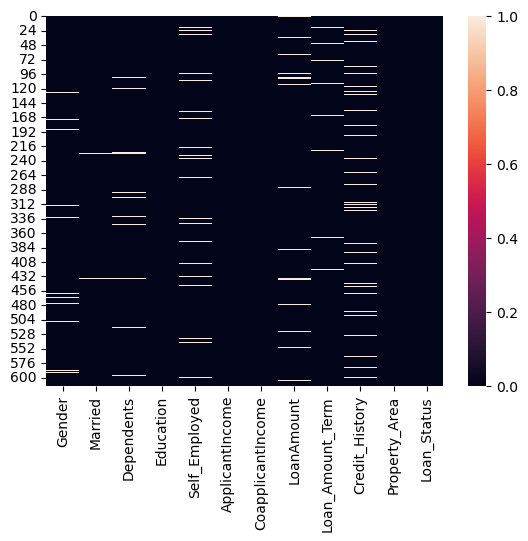

In [15]:
sns.heatmap(df.isnull())

The white lines in the heat map represent the missing values in the dataset

In [16]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Using imputation technique to treat null values

There are both categorical and numerical columns which have missing values, so will fill them by using appropriate methods.

The features Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History are seems to be categorical so will fill the missing values using their mode values

In [17]:
print("The mode of Gender  is:",df['Gender'].mode())
print("The mode of Married  is:",df['Married'].mode())
print("The mode of Dependents  is:",df['Dependents'].mode())
print("The mode of Self_Employed  is:",df['Self_Employed'].mode())
print("The mode of Credit_History  is:",df['Credit_History'].mode())
print("The mode of Loan_Amount_Term  is:",df['Loan_Amount_Term'].mode())

The mode of Gender  is: 0    Male
Name: Gender, dtype: object
The mode of Married  is: 0    Yes
Name: Married, dtype: object
The mode of Dependents  is: 0    0
Name: Dependents, dtype: object
The mode of Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64
The mode of Loan_Amount_Term  is: 0    360.0
Name: Loan_Amount_Term, dtype: float64


These are modes of the categorical columns which contains null values.
These are the values which are highly repeated in the columns.

The missing values will be replaced by their respective mode values.

In [18]:
# Filling the missing values in Gender by its mode Male
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode Yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values in Dependents by its mode 0 
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing values in Self_Employed by its mode No
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing values in Credit_History  by its mode  No
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing values in Loan_Amount_Term  by its mode 360 
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

So here we have filled the missing values in the categorical columns using mode method.
let's check the null values now.

In [19]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Here LoanAmount is continuous in nature also has skewness which means it has outliers, so will fill the null values using median method.
Now let's fill the null values in numerical columns

In [21]:
# let's check the median values of the numerical columns
print("The median of LoanAmount is:", df["LoanAmount"].median())

The median of LoanAmount is: 128.0


The median values of LoanAmount is 128.0 let's fill the null values using median method.

In [22]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

We have filled the null values in all the coluns. let's check it

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now our data is free from null values and is cleaned.

<AxesSubplot:>

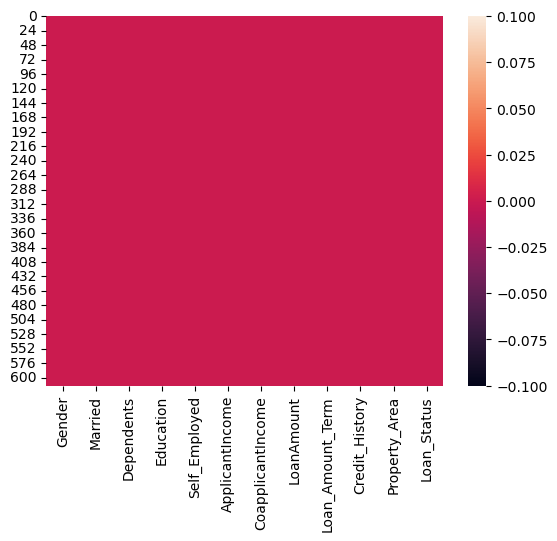

In [24]:
sns.heatmap(df.isnull())

So it is clear that there are no missing values anymore

In [25]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the columns present in the dataset

In [26]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

These are the unique values present in the target column

In [27]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have 2 counts in Loan_Status namely 'Y' and 'N'. Here 'Y' stands for 'Yes' that is the loan of the applicant is approved and 'N' stands for 'No' that is the loan of the applicant is not approved.

Here loan approved has high counts than loan not approved.

In [28]:
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


It seems that there are no spaces in the dataset.

# Description of DataSet

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset

The summary of this dataset looks perfect since there is no negative/invalid vlaues present it gives the summary of nunerical data.
From the above description we can observe the following things :

The counts of all the columns are same which means there are no null values present in the dataset.
The mean value is greater than the median(50%) in ApplicatIncome, CoapplicantIncome, LoanAmount, which means they are skewed to right.
The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.
There is a huge difference between mean and the standard deviation.
In Summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset .
We will remove these outliers using ZSCORE or IQR method in later part

# Data Visualization

# Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


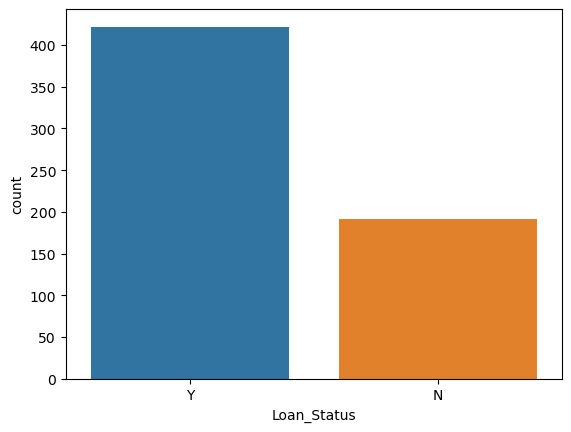

In [31]:
# visualizing the loan approval status
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])
plt.show()

The count of 'Y' is maximum compare to 'N' that means total 422 applicants get their loan approved and only 192 applicants gets dinied due to some reason.

We can also notice the class imbalancing issue here, So we can use oversampling method just to increase the instances of minority class.

Male      502
Female    112
Name: Gender, dtype: int64


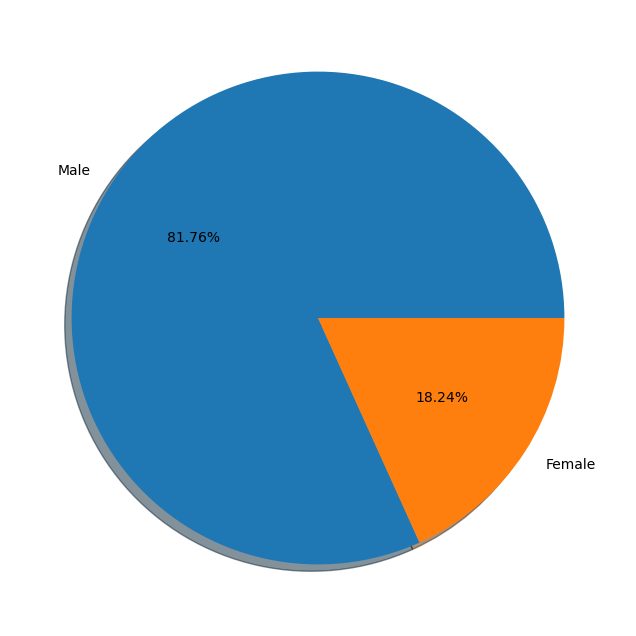

In [32]:
print(df['Gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are more number of Male applicants applying for loan than Female applicants.

There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan.

Yes    401
No     213
Name: Married, dtype: int64


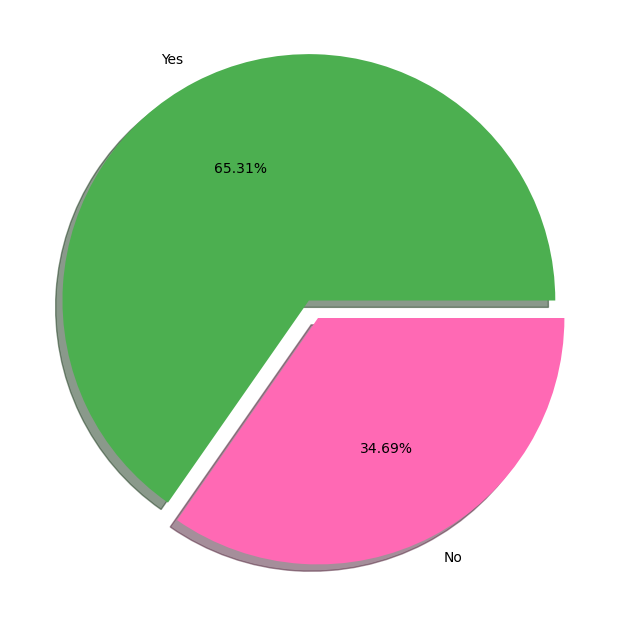

In [34]:
print(df['Married'].value_counts())
labels='Yes','No'
colors = ['#4CAF50', 'hotpink']
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors, explode=(0.08,0))
plt.show()

The numbeer of Married applicants who are applying for loan is higher than Unmarried applicants.

There are about 65% of the applicants who got married and about 34% of the applicants are singles

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


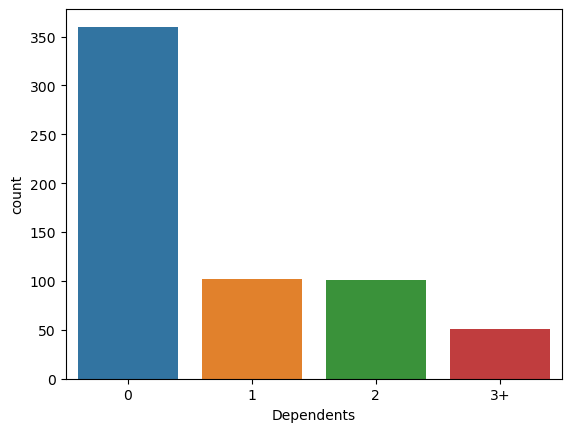

In [36]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


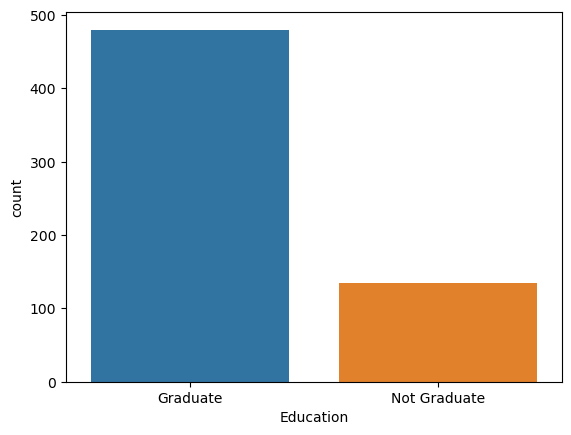

In [37]:
print(df['Education'].value_counts())
sns.countplot(df['Education'])
plt.show()

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan

No     532
Yes     82
Name: Self_Employed, dtype: int64


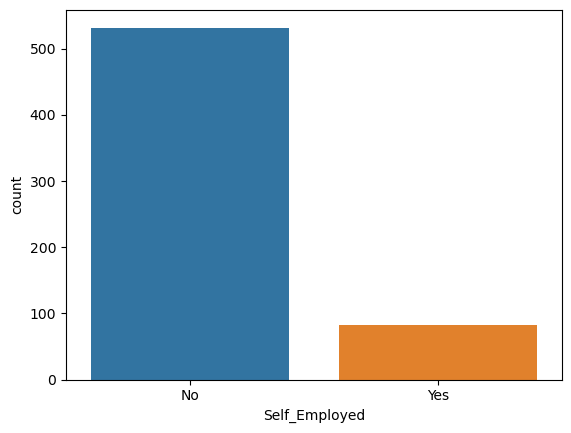

In [38]:
#self employed applicants
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])
plt.show()

Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own business

1.0    525
0.0     89
Name: Credit_History, dtype: int64


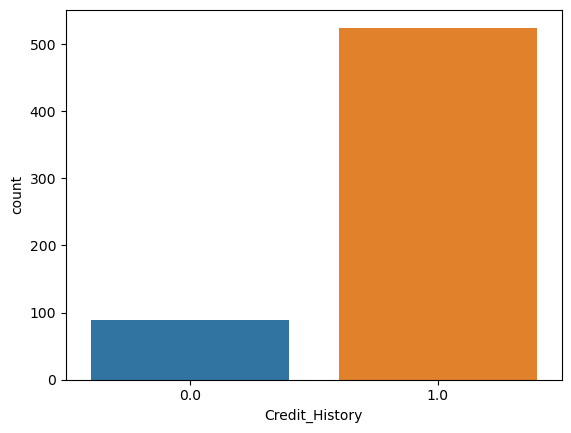

In [39]:
#credit_history of applicants
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])
plt.show()

Most of the applicants who have credit history 1 are high in numbers

# Distribution of Skewness

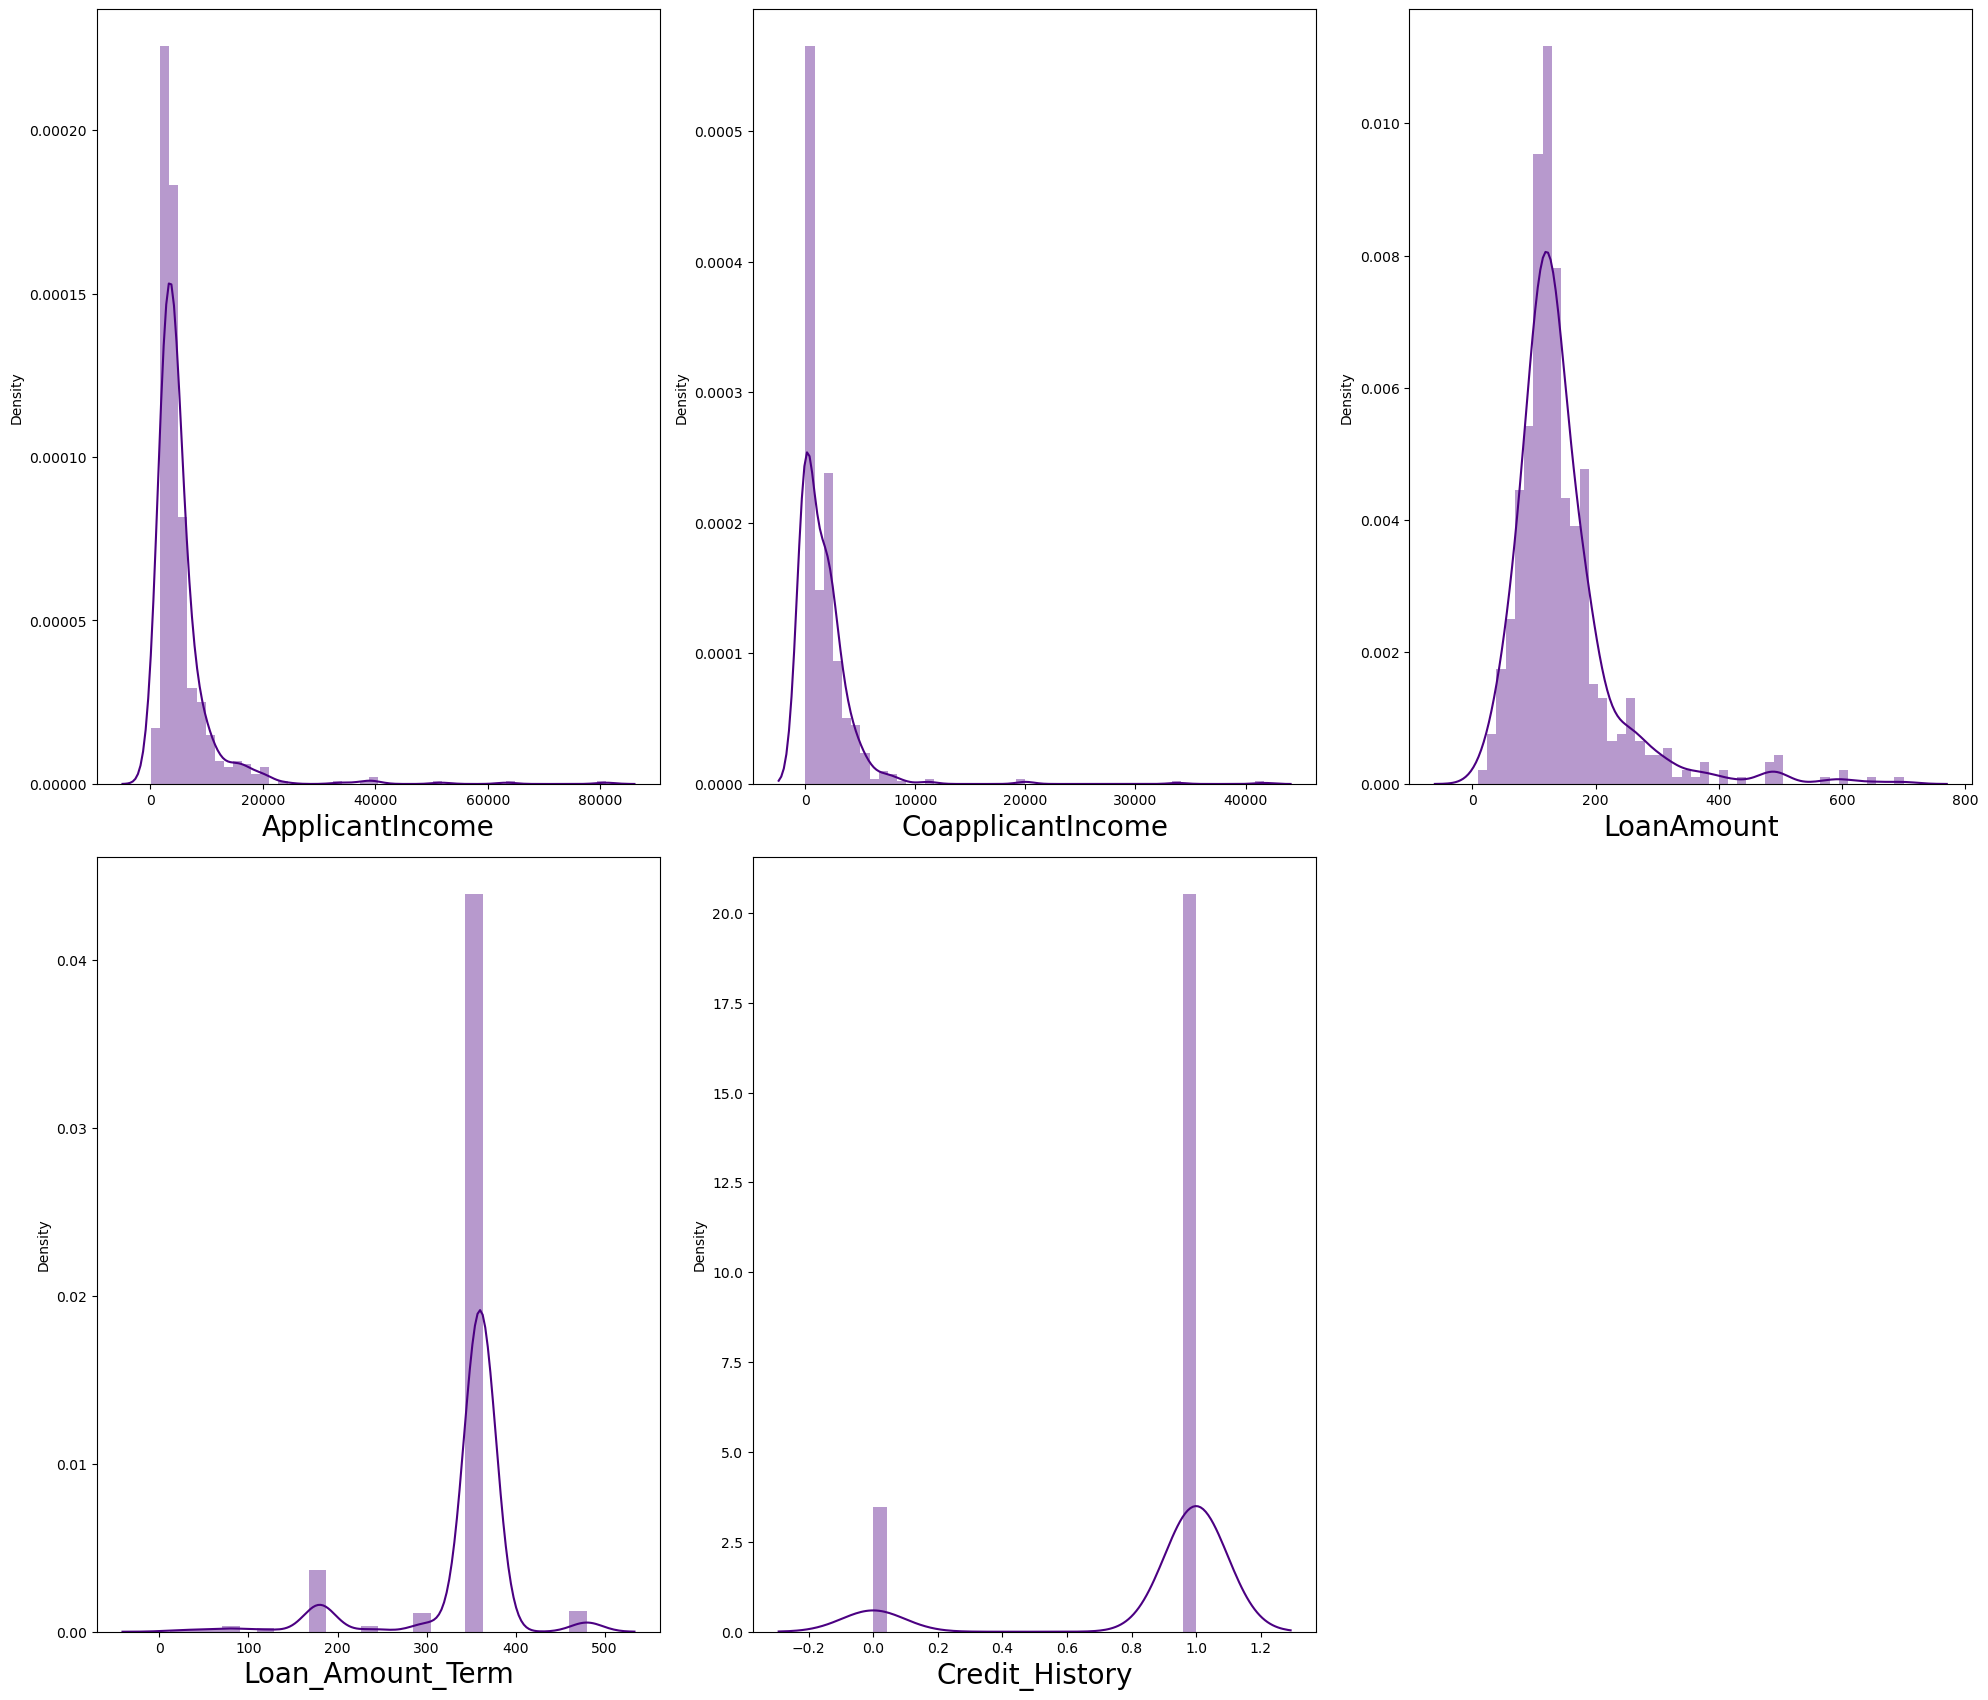

In [40]:
# Data distributed in each columns 
plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='indigo')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From above distribution plot we can observe :

The data is not normally distributed in any of the columns.
The mean value is greater than the median in ApplicatIncome, CoapplicantIncome, LoanAmount and ToalIncome which means they are skewed to right.
The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left.
We will remove these skewness usnin appropriate method in the later part

# Bivariate Analysis

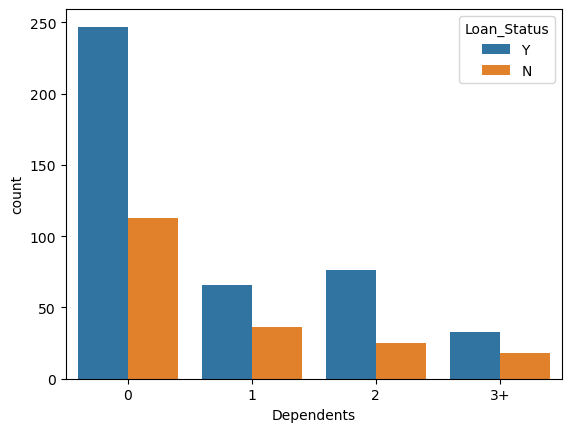

In [41]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.show()

The counts of 0 dependents is high which means most of the applicants have no dependents . Having dependents means having commitments. The 3+ dependents means more than 3 applicants have dependents.

The applicants who have dependents 0 are more likely to get their loan approved

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


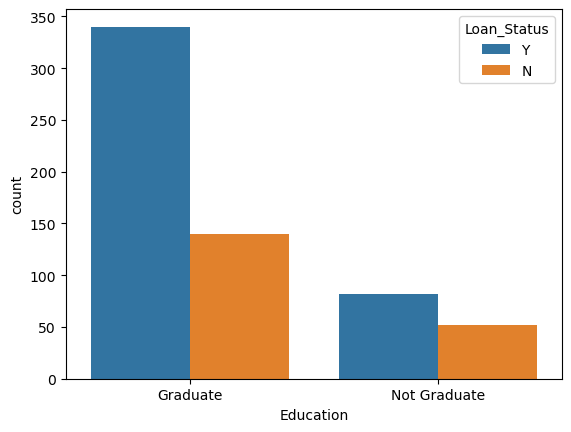

In [42]:
# visualizing count  of Education of the applicants
print(df['Education'].value_counts())
sns.countplot(df['Education'],hue=df['Loan_Status'])
plt.show()

Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not.

No     532
Yes     82
Name: Self_Employed, dtype: int64


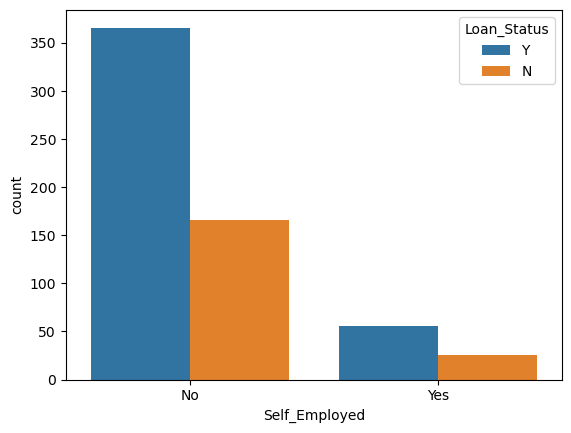

In [43]:
# visualizing whether the applicants are Self_Employed or not
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
plt.show()

Most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are Self_Employed
The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


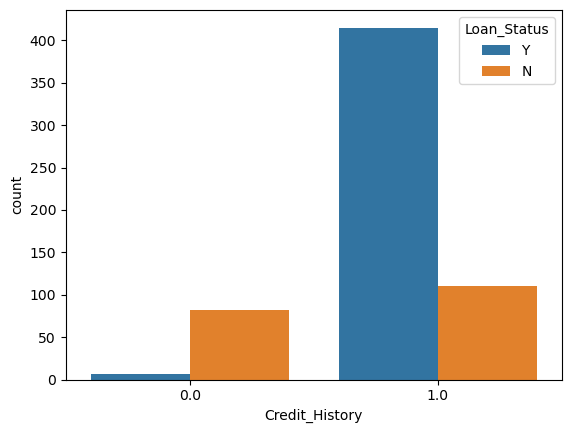

In [44]:
# visualizing the count of the Credit_History of the applicants
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
plt.show()

The Credit_History gives the information of the applicants who took in the past have cleared or not. Here we can notice the applicants who have credit history 1 have high counts which means most of the applicants have cleared their past loan only few of them have to clear the loan.
The applicants who have credit history 1 have got their loan approval which means they have cleared their past loans

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


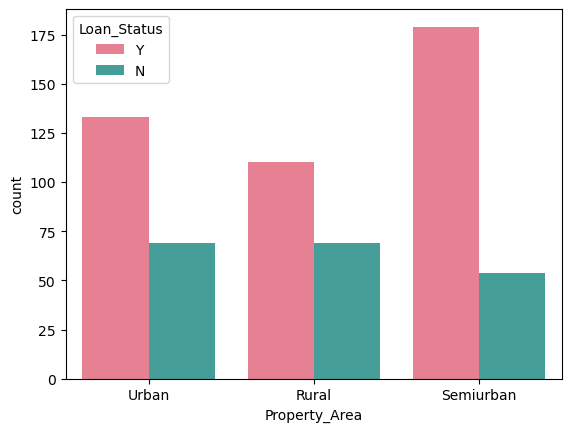

In [45]:
#property Area of applicants
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='husl')
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


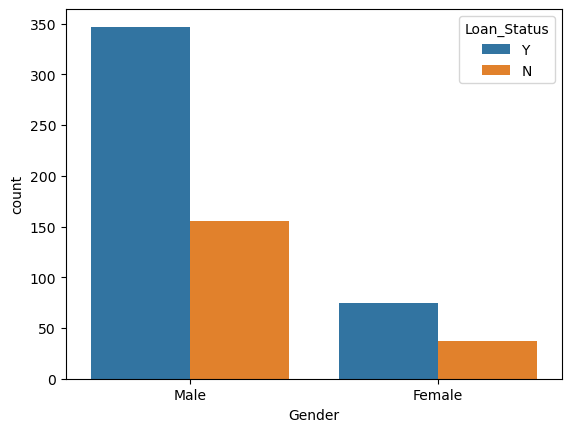

In [46]:
#Gender of applicnats
print(df['Gender'].value_counts())
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

The male applicnats who have applied for the loan have got approved compared to the female applicants

Yes    401
No     213
Name: Married, dtype: int64


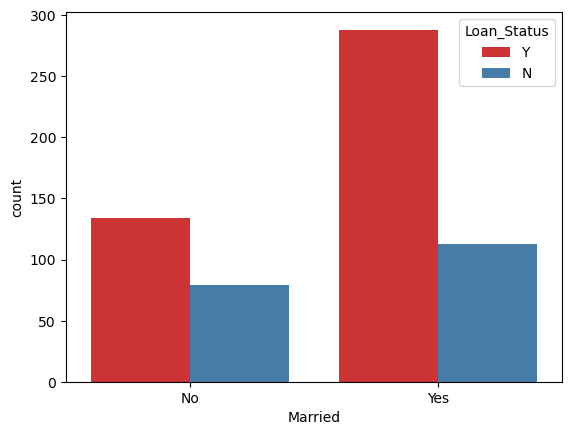

In [48]:
# Married status of the applicants
print(df['Married'].value_counts())
sns.countplot(df['Married'],hue=df['Loan_Status'],palette="Set1")
plt.show()

There are more number of Male applicants who are applying for loan than compared to Female applicants. Also more Male candidates loans got approved compared to Female

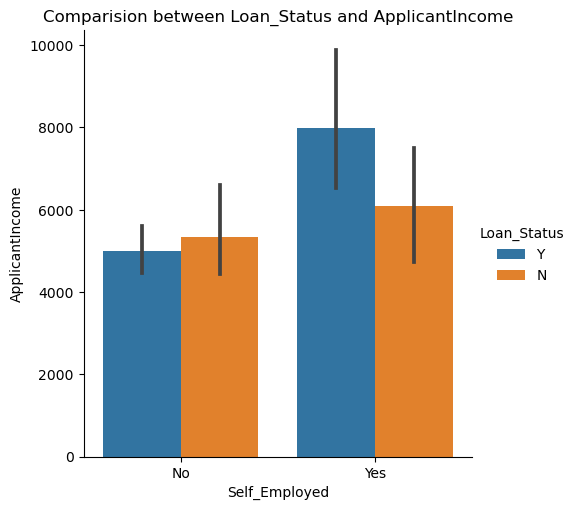

In [52]:
# checking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loan got approved have average income and have their own business means they are self employed

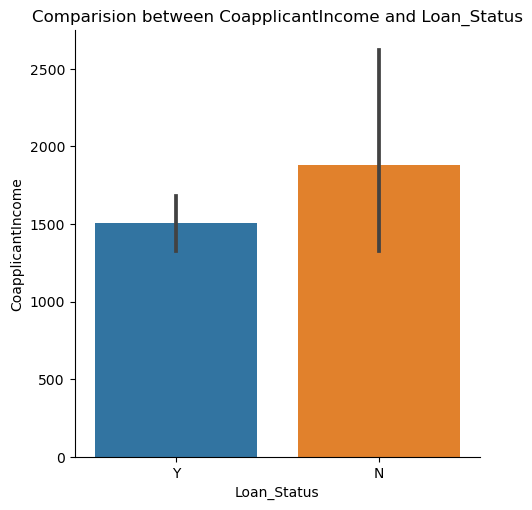

In [54]:
# checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind='bar')
plt.title("Comparision between CoapplicantIncome and Loan_Status")
plt.show()

The coapplicants who got loan have average income

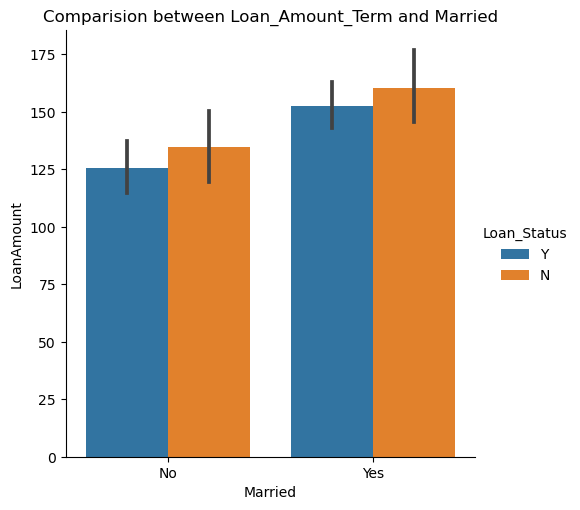

In [55]:
# checking relation between LoanAmount and Married on the basis of target
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

The applicant who got married and have average loan amount have more tendency to getting loan

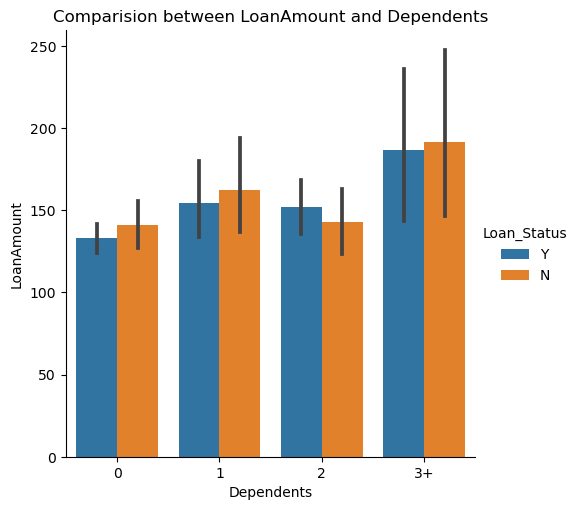

In [56]:
# checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount have got their loan approved.

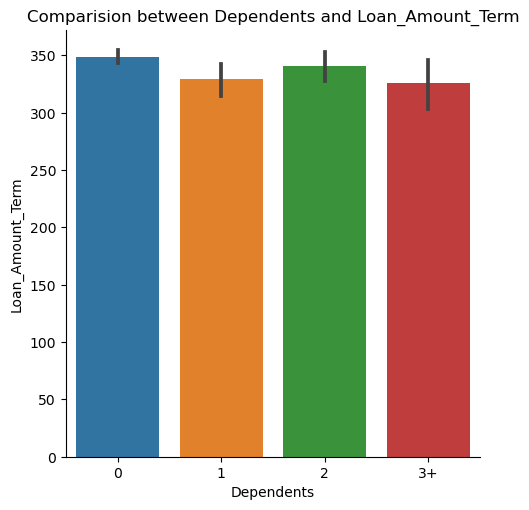

In [57]:
# checking relation between Loan_Amount_Term and Dependents
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high Loan amount term followed by the dependents 2

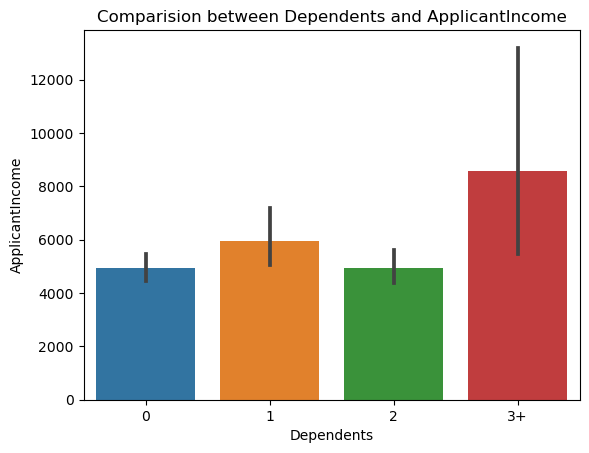

In [58]:
# let's check the applicant income as per Dependents
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income

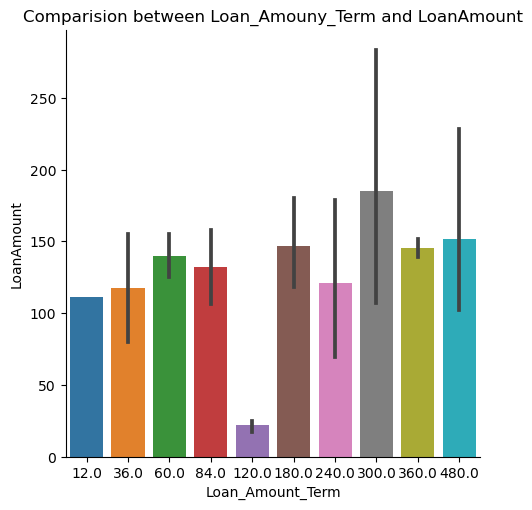

In [59]:
# comparing Loan_Amount_Term and LoanAmount
sns.catplot(x='Loan_Amount_Term',y="LoanAmount",data=df,kind='bar')
plt.title("Comparision between Loan_Amouny_Term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others

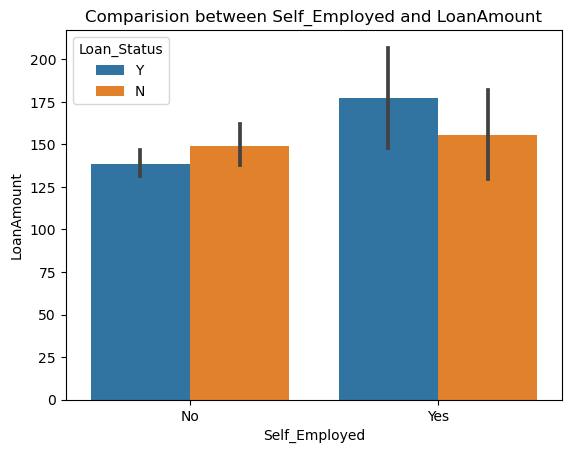

In [60]:
# let's compare the loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue='Loan_Status')
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

The average loan amount demanded by the self employed is more compare to the other also the loan approval for self employes applicants with average loan amount is high compare to the applicants who are not self employed

# Multivariate Analysis

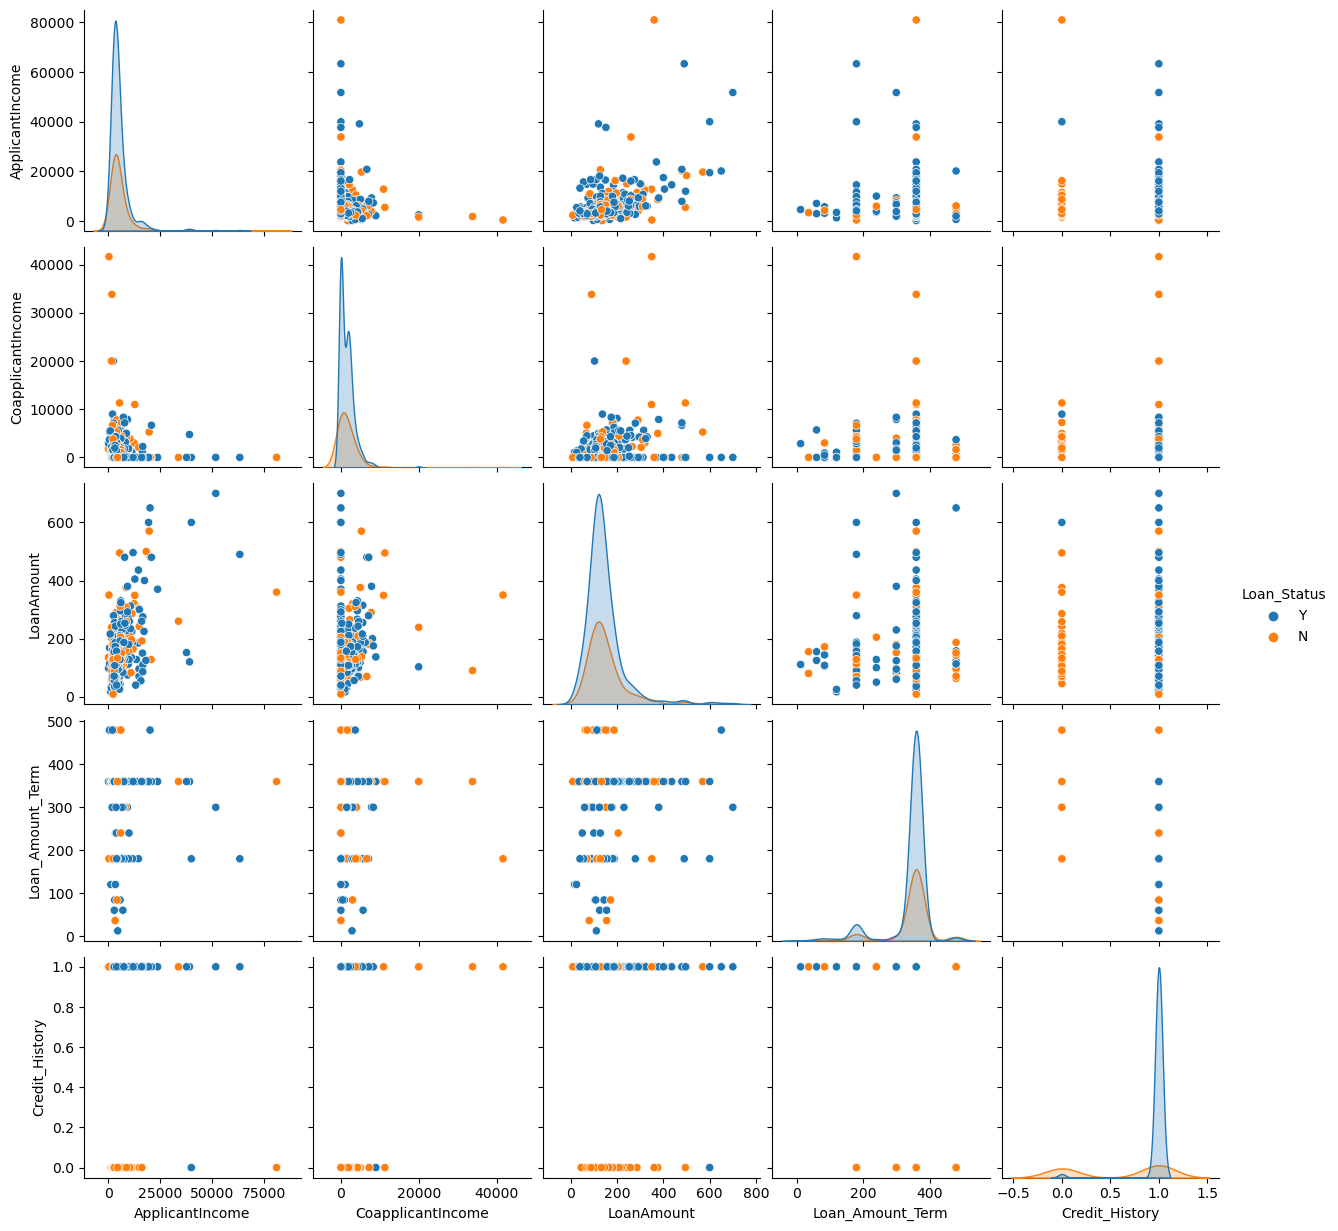

In [61]:
# checking the pairwise relation in the dataset
sns.pairplot(df,hue="Loan_Status")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status". Here we can ovserve the relation between the features and label.
We can observe the linear relationship between ApplicatIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.
We can also observe the correlation in some columns also there are outliers present in some of the columns

# Identifying the outliers

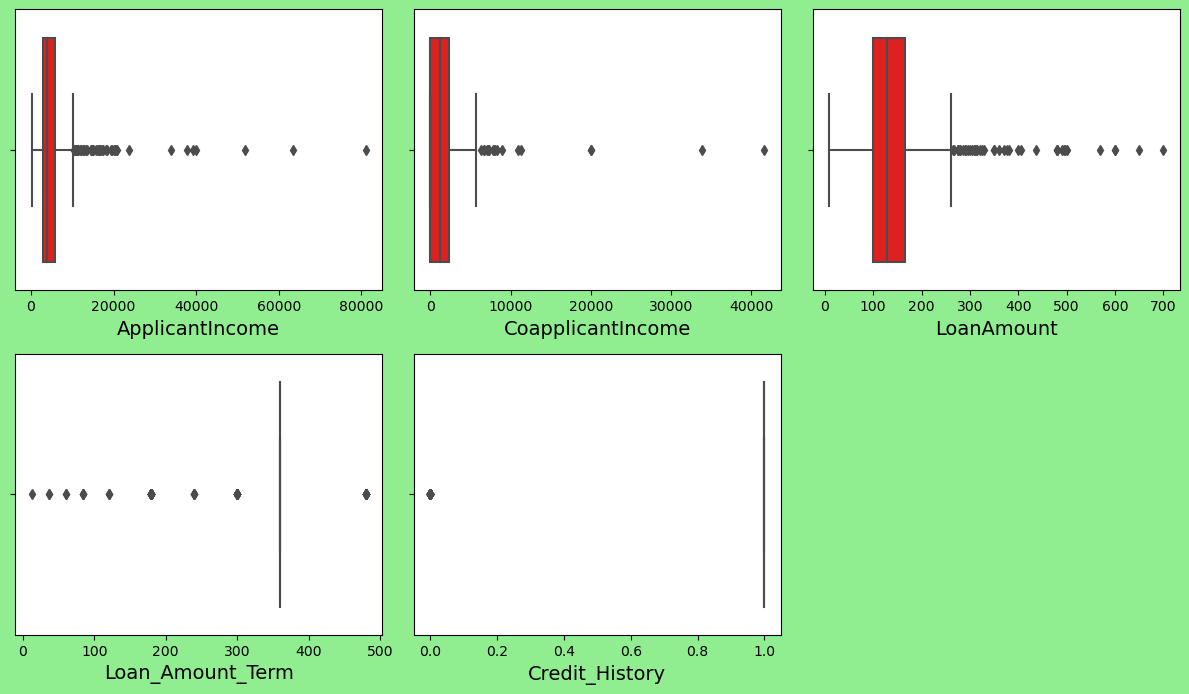

In [63]:
plt.figure(figsize=(12,10),facecolor='lightgreen')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

We can observe the outliers present in all the columns . But the columns Credit History has only 2 unique values so no need to remove outliers in this column.
Let's remove outliers in remaining columns them using ZSCORE Method.

# Removing Outliers

In [64]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
# numerical columns containing outliers
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


Now we have removed the outliers, let's check the dataloss by creating new dataframe

In [66]:
new_df = df[(z<3).all(axis=1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the new dataframe after removing the outliers . Here we have removed the outliers whose zscore is less than 3

In [68]:
df.shape

(614, 12)

In [69]:
new_df.shape

(577, 12)

After removing the outliers we have 577 rows and 12 columns

DATA LOSS

In [70]:
data_loss = (614-577)/614*100
data_loss

6.026058631921824

So here we have removed outliers using zscore method and we are losing only 6% data.

Let's remove the outliers and check data loss using IQR method.

# IQR METHOD

In [71]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3-Q1
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [72]:
df1.shape

(459, 12)

DATA LOSS

In [73]:
data_loss = (614-459)/614*100
data_loss

25.2442996742671

using IQR method we are losing 25% of data. So considering zscore method

In [75]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

The skewness present in all the above columns. Here the columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns

# Removing Skewness using yeo-johnson method

In [76]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [77]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [78]:
# checking skewness after using yeo-johnson method
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

So here we have removed the skewness using yeo-hohnson method . The skewness has been removed in all the numerical integer type columns.

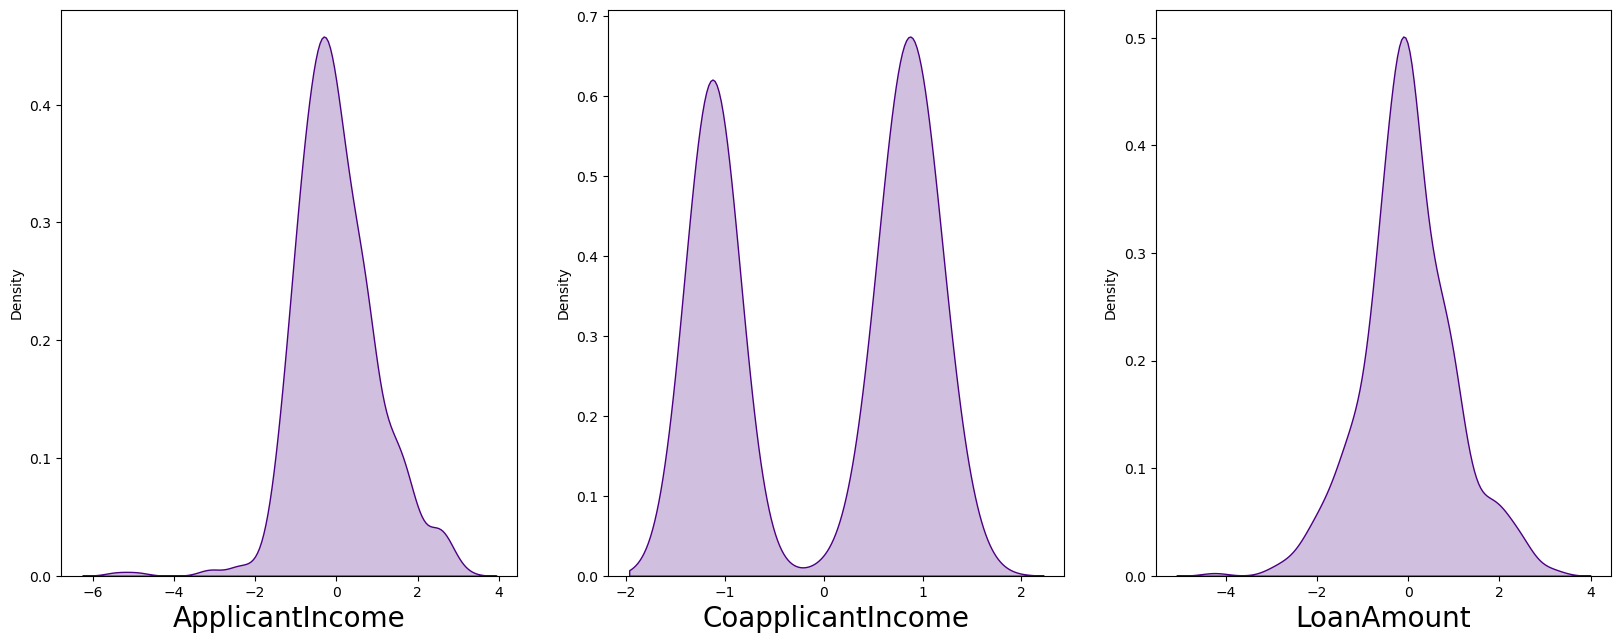

In [81]:
#let's check data distribution now
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is almost normal also we have removed the skewness that we can notice in the above distplot

Encoding the categorical columns using Label Encoding

# Encoding the categorical columns using Label Encoding

In [82]:
categorical_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [83]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoding the categorical columns using label encoder

In [84]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


The categorical columns have been converted into numerical columns by using label encoding

# Correlation between the target variable and independent variables using HEAT map

In [85]:
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map

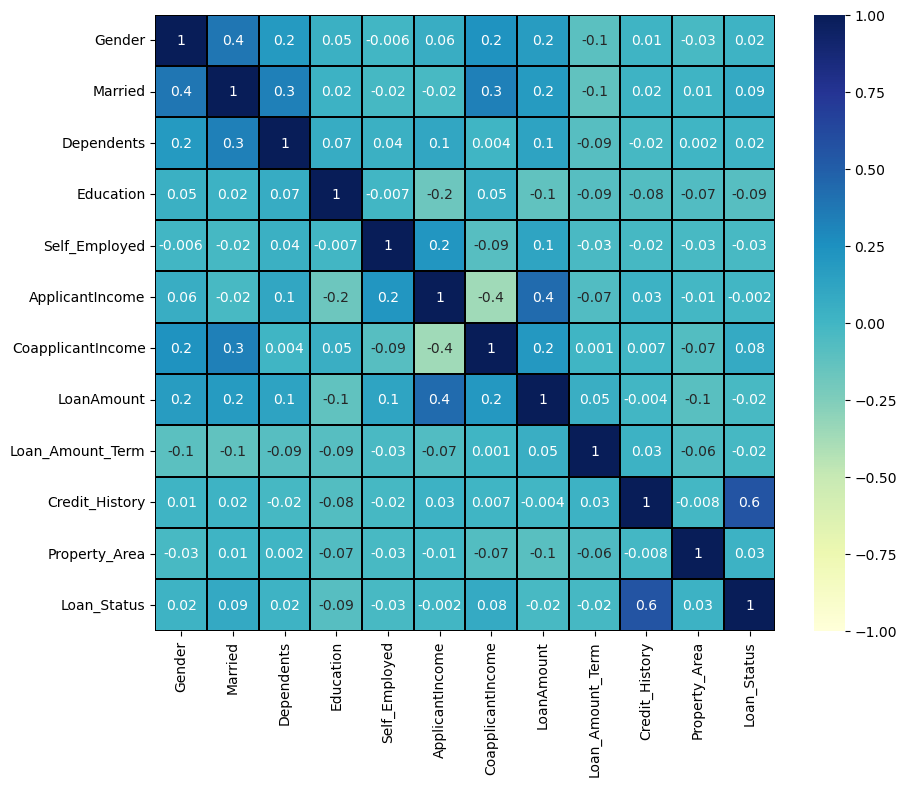

In [86]:
# visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heatmap contains both positive and negative correlation.

The target column Loan_Status is highly positively correlated with the feature Credit_History.
The other features have very less correlation with the target column.
Also we can notice there is no multicolinearity issue in the features. Features have moderate level of correlation with each other.
ApplicantIncome and Gender is very less correlated with the target.
Dark shades are highly correlated and light shades are very less correlated

In [87]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.023609
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

Here we can see the positive and negative correlation of target and features.

# Visualizing the correlation between label and features using bar plot

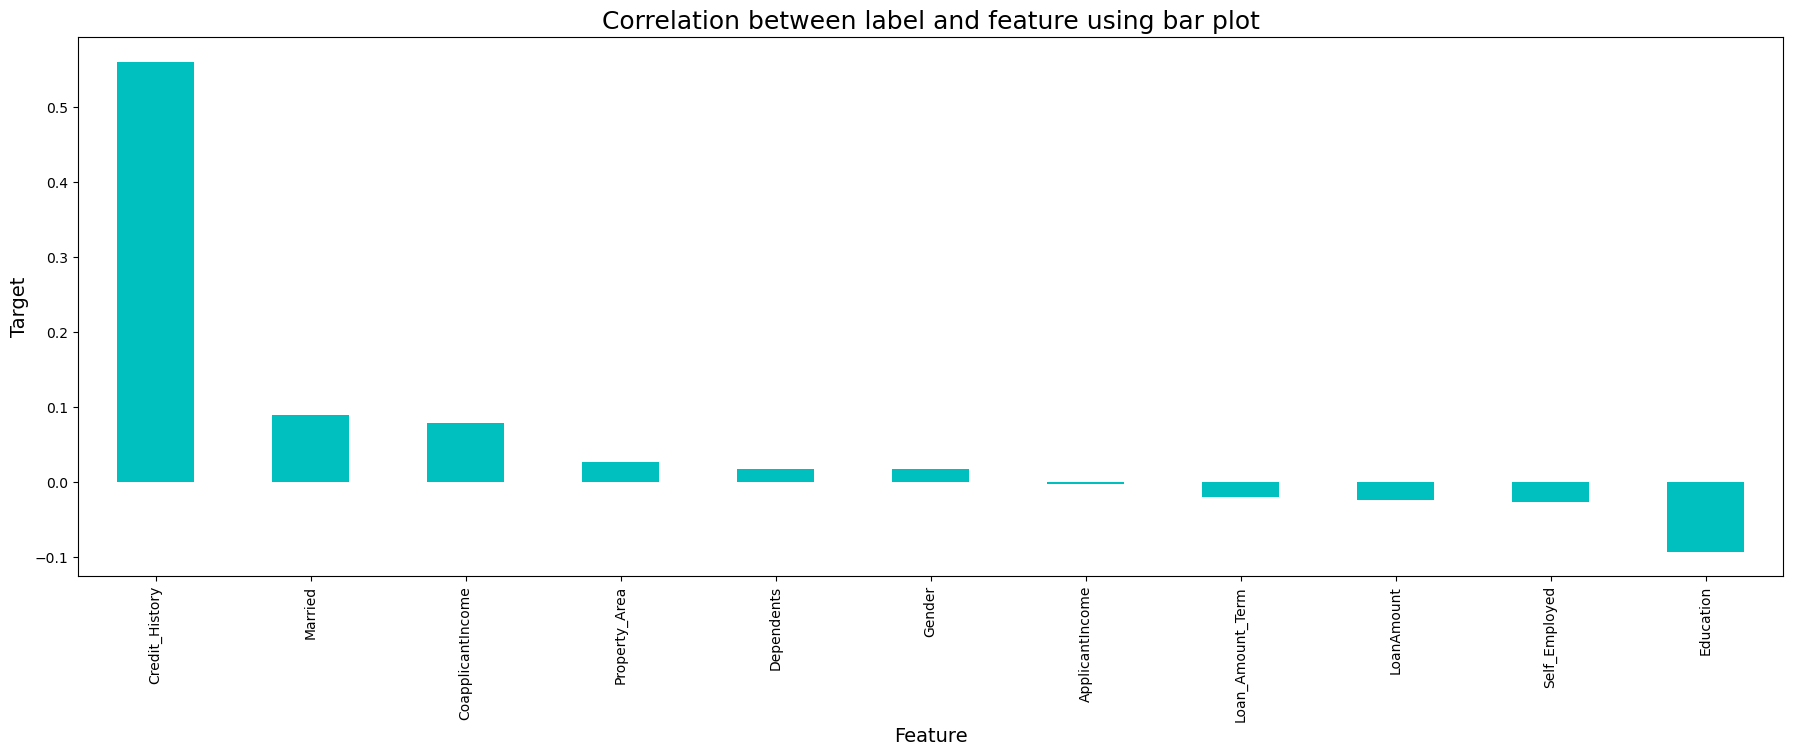

In [89]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between label and feature using bar plot", fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target . So we can drop this column if necessary

# Separating the features and label variables into x and y

In [90]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

We have seperated both dependent and independent variables.

In [91]:
x.shape

(577, 11)

In [92]:
y.shape

(577,)

Here are the dimension of x and y

# Feature Scaling using Standard Scalarization

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


We have scaled the data using standard scalarization method to overcome with the issue of data biasness

In [95]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can notice the class imbalancing issue so let's use SMOTE to balance the data

# Oversampling

In [96]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [97]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

The data is balance now, Since the highest count of the target is 398 . So the data is balance by oversampling all the classes to the count 398

In [98]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


We have done with the preprocessing and data cleaning . Now let's move to build the model

# Modeling
Finding best random state

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8828451882845189  on Random_state  86


The best accuracy is 89.12 on the Random state 46

# Creating train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State

# Classification Algorithm

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [102]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

# prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.7698744769874477
[[ 83  20]
 [ 35 101]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       103
           1       0.83      0.74      0.79       136

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.78      0.77      0.77       239



The accuracy using DTC is 77%

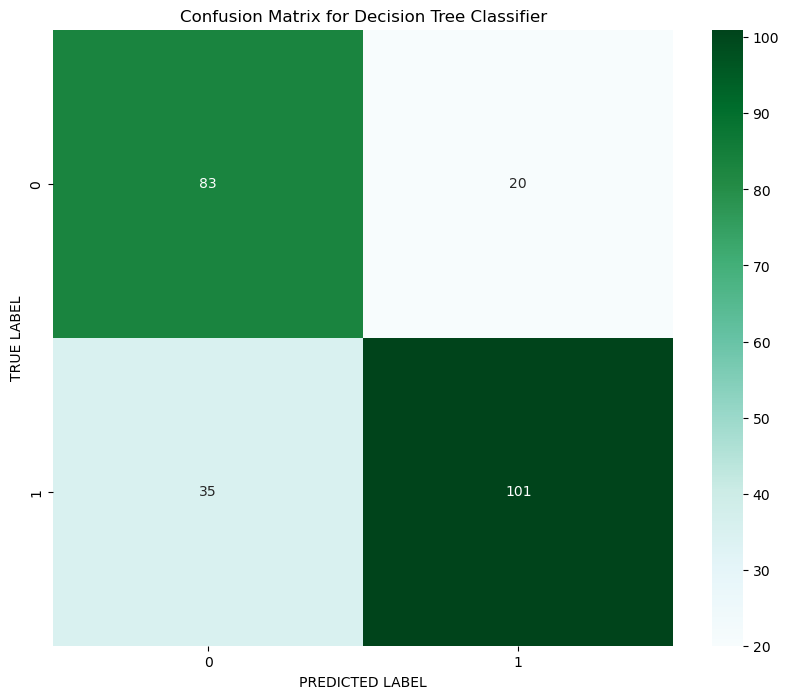

In [104]:
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot = True, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

This is the confusion matrix for Decision Tree Classifier where we can observe the true positive rate, true negative rate and false negative rate and is ploted predicted value against true values.

# Random Forest Classifier

In [105]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8828451882845189
[[ 89  14]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.90      0.90      0.90       136

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



The accuracy using RFC is 87%

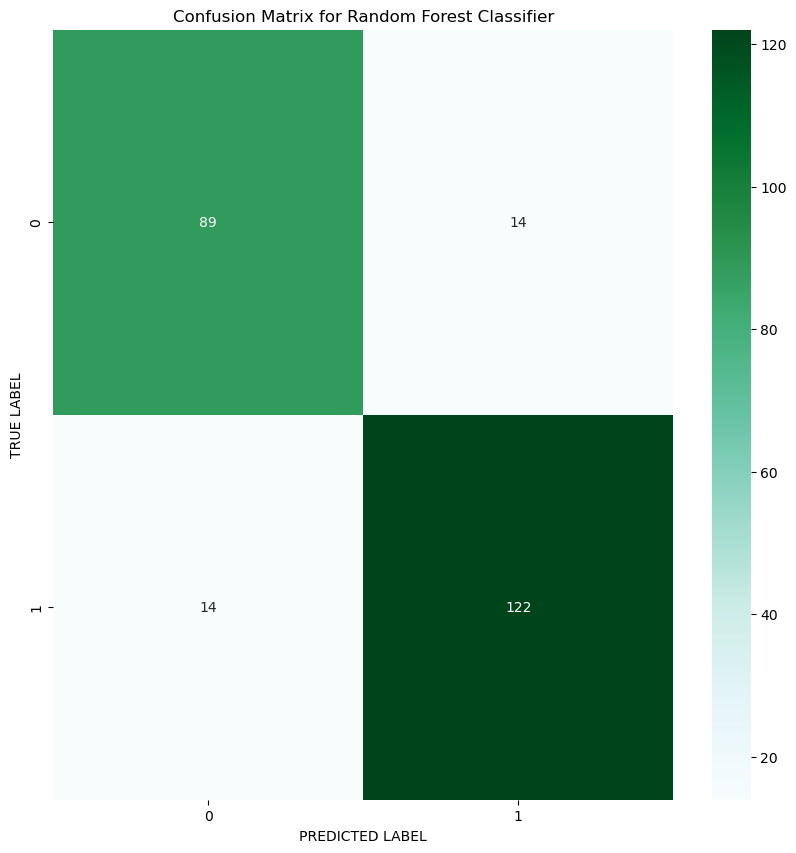

In [107]:
#confusion matrix for RFC
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

This is the confusion matrix for Random Forest Classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate and is ploted predicted value against True values

# Logistic Regression

In [108]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7615062761506276
[[ 58  45]
 [ 12 124]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67       103
           1       0.73      0.91      0.81       136

    accuracy                           0.76       239
   macro avg       0.78      0.74      0.74       239
weighted avg       0.77      0.76      0.75       239



The accuracy using LR is 74%

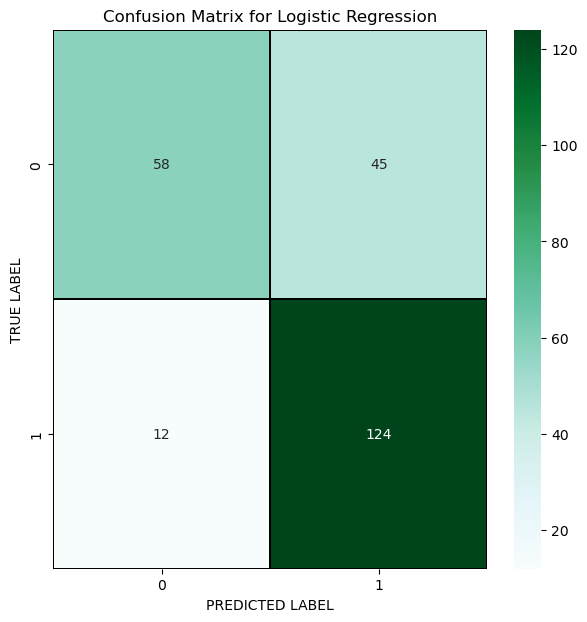

In [109]:
# let's plot confusion matrix for LR
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

This is the confusion matrix for Logistic Regression classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values.

In [110]:
svc = SVC()
svc.fit(x_train,y_train)

# prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.799163179916318
[[ 64  39]
 [  9 127]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       103
           1       0.77      0.93      0.84       136

    accuracy                           0.80       239
   macro avg       0.82      0.78      0.78       239
weighted avg       0.81      0.80      0.79       239



The accuracy using svc is 75%

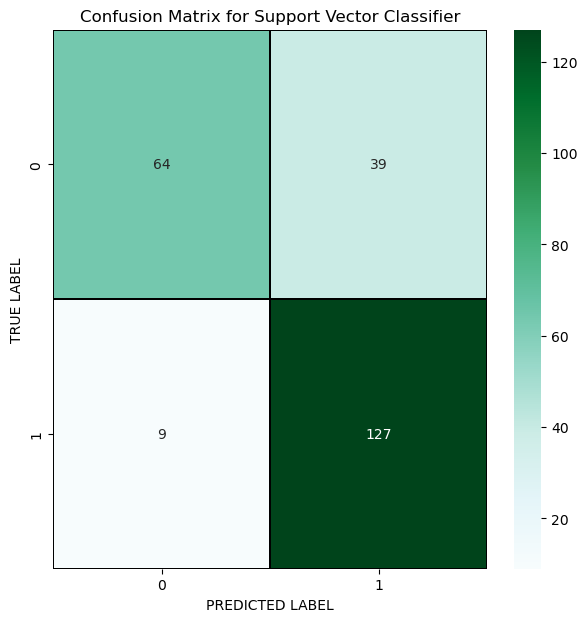

In [111]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

This is the confusion matrix for Support Vector classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values.

# KNeighbors Classifier

In [112]:
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7866108786610879
[[ 82  21]
 [ 30 106]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       103
           1       0.83      0.78      0.81       136

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.79      0.79       239



The accuracy using KNN is 75%

Text(0.5, 1.0, 'Confusion Matrix for KNeighbors Classifier')

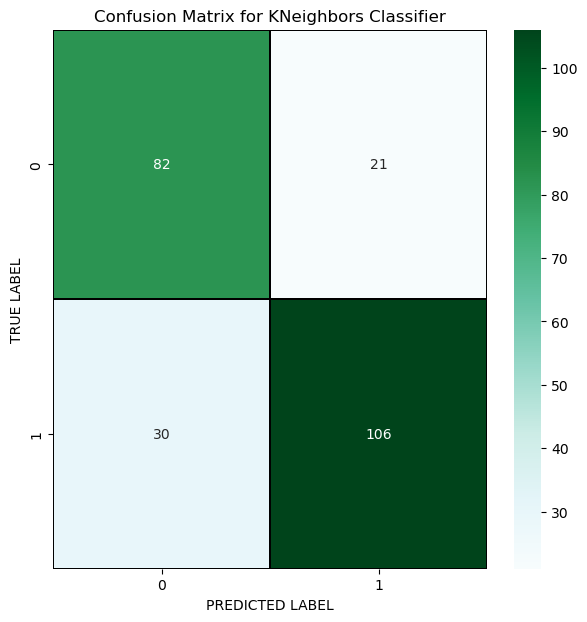

In [113]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighbors Classifier")

This is the confusion matrix for KNeighbors classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values

# Gradient Boosting Classifier

In [114]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8410041841004184
[[ 79  24]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       103
           1       0.84      0.90      0.87       136

    accuracy                           0.84       239
   macro avg       0.84      0.83      0.84       239
weighted avg       0.84      0.84      0.84       239



The accuracy using GB is 84%

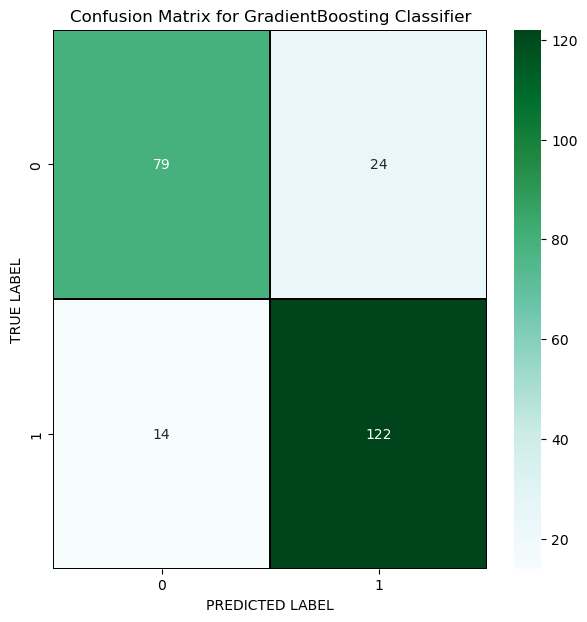

In [116]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GradientBoosting Classifier")
plt.show()

This is the confusion matrix for Gradient Boosting classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values

# AdaBoost Classifier

In [117]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.799163179916318
[[ 78  25]
 [ 23 113]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       103
           1       0.82      0.83      0.82       136

    accuracy                           0.80       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.80      0.80       239



The accuracy using AdaBoost Classifier is 79%

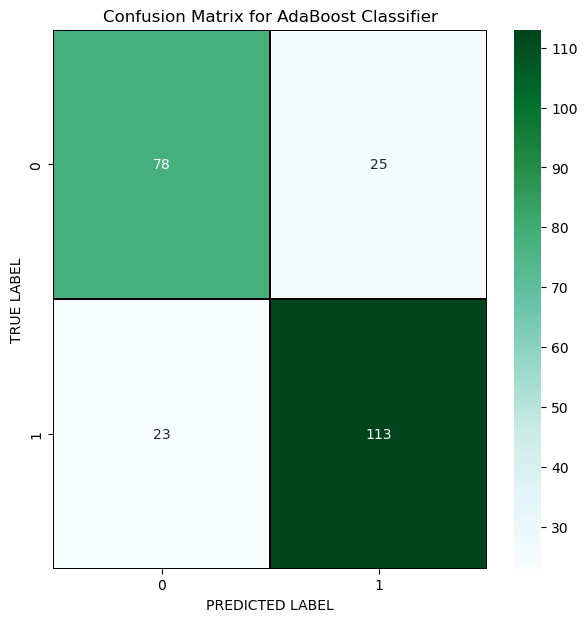

In [118]:
# let's plot confusion matrix for ABC
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()

This is the confusion matrix for Ada Boost classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values.

# GaussianNB Classifier

In [119]:
NB = GaussianNB()
NB.fit(x_train,y_train)

# prediction
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test, predNB))

0.7531380753138075
[[ 47  56]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.94      0.46      0.61       103
           1       0.70      0.98      0.82       136

    accuracy                           0.75       239
   macro avg       0.82      0.72      0.72       239
weighted avg       0.81      0.75      0.73       239



The accuracy using NB is 74%

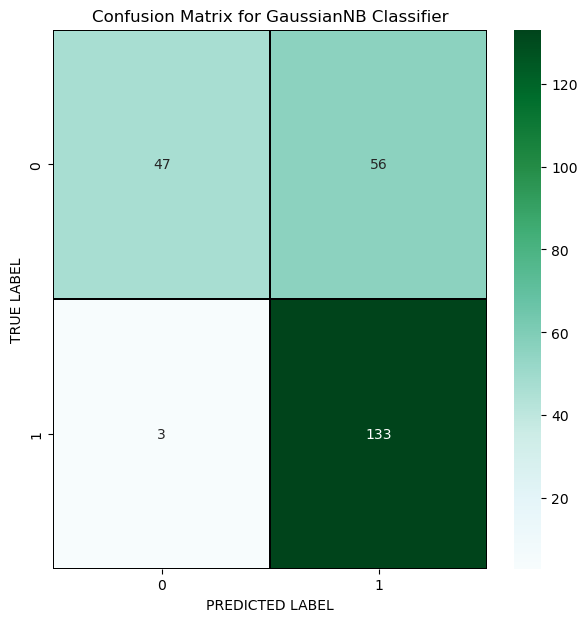

In [120]:
# let's plot confusion matrix for NB
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = ".0f", ax=ax, cmap="BuGn", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GaussianNB Classifier")
plt.show()

This is the confusion matrix for GaussianNB classifier where we can observe the true positive rate, false positive rate, ture negative rate and false negative rate and is ploted prdicted value against true values.

# Checking the Cross Validation Score

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC ,x,y,cv=5).mean())

0.7576650943396226


In [123]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())

0.8267216981132076


In [124]:
# cv score for Logistic Regression
print(cross_val_score(LR ,x,y,cv=5).mean())

0.7060534591194968


In [125]:
# cv score for Support Vector Classifier
print(cross_val_score(svc ,x,y,cv=5).mean())

0.7299292452830188


In [126]:
# cv score for KNN Classifier
print(cross_val_score(knn ,x,y,cv=5).mean())

0.7362185534591195


In [127]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.7953301886792452


In [128]:
# cv score for Ada Boost Classifier
print(cross_val_score(ABC ,x,y,cv=5).mean())

0.7374921383647799


In [129]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB ,x,y,cv=5).mean())

0.7047955974842768


Above are the cross validation score for the models.
From the difference between the accuracy score and the cross validation score we can conclude that KNeighbors Classifier as our best fitting model which is giving very less difference compare to other models

# Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV
# KNeighbors Classifier
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance'],
             'p':[1,2,3,4,5]}

These are the parameters for KNN Classifier

In [131]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

Running GridSearchCV for KNN

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [133]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

These are the best parameters values that we have got for KNN Classifier

In [134]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train,y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.68200836820083


The accuracy of best model increased by 5% after tuning and giving 83.26% which is very good.

# Plotting ROC and compare AUC for all the models used

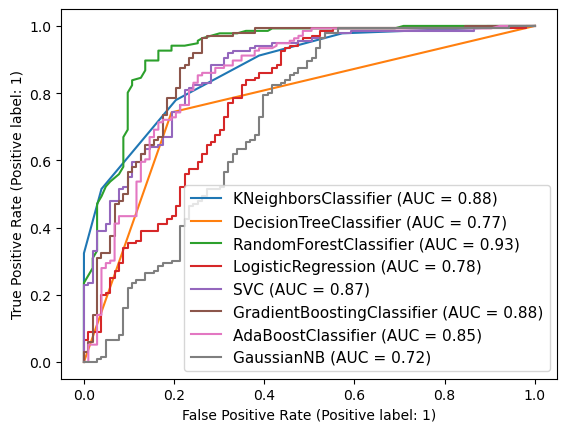

In [136]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC , x_test, y_test, ax=disp.ax_)      # ax_=Axes with confusion matrix
plot_roc_curve(RFC , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(LR , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(svc , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(GB , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(ABC , x_test, y_test, ax=disp.ax_)
plot_roc_curve(NB , x_test, y_test, ax=disp.ax_) 

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

This is the AUC-ROC curve for the models that we have used and is plotted False positive rate against True positive rate.

# Plotting ROC and compare AUC for the best model KNeighbors Classifier

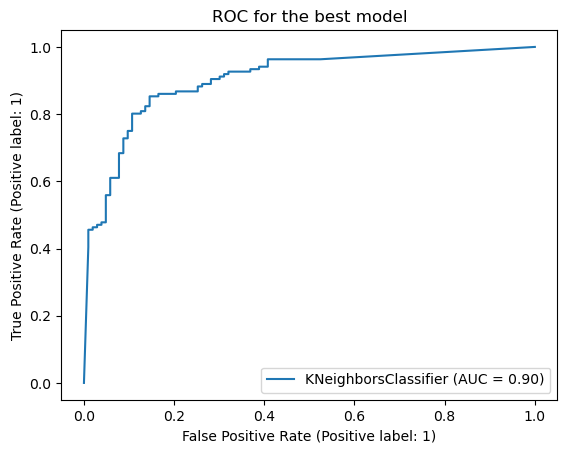

In [137]:
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

This is the ROC curve for the best model KNN and AUC for KNN is 91%

# Saving the Model

In [138]:
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

We have saved our model using joblib library

# Predicting the saved model

In [139]:
# let's load the saved model and get the prediction
# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

These are the predicted loan approval status of the applicants

In [140]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Driginal"]).T

,Predicted,Driginal
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
234,0,0
235,1,1
236,0,0
237,1,1


We can observe both original and predicted values are same.
That means the loan approval status for both predicted and original are same.